In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#data exploration
#customer id has no usage
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#'TotalCharges' are in object(should be a float)
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
#to show the blank entries in total charges column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
#dropping these empty data
df_1=df[df.TotalCharges!=' ']
df_1.shape

(7032, 20)

In [7]:
df_1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#converting TotalCharges to float
df_1.TotalCharges=pd.to_numeric(df_1.TotalCharges)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_1.TotalCharges.dtypes

dtype('float64')

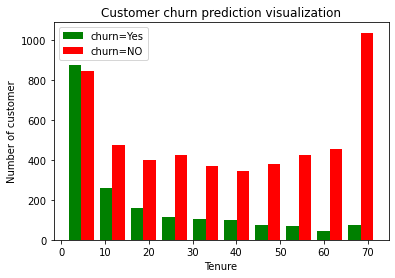

In [10]:
#visualization-1
#checking tenure
tenure_churn_no=df_1[df_1.Churn=='No'].tenure
tenure_churn_yes=df_1[df_1.Churn=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('Number of customer')
plt.title("Customer churn prediction visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green",'red'])
plt.legend(["churn=Yes","churn=NO"])

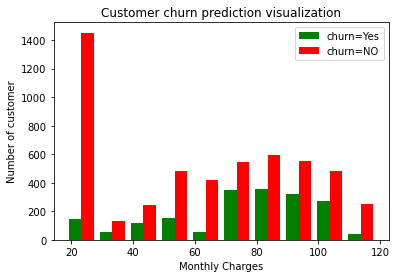

In [11]:
#Visualization-2
#based on montly charges
mc_churn_no=df_1[df_1.Churn=='No'].MonthlyCharges
mc_churn_yes=df_1[df_1.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customer')
plt.title("Customer churn prediction visualization")
plt.hist([mc_churn_yes,mc_churn_no],color=["green",'red'])
plt.legend(["churn=Yes","churn=NO"])

In [12]:
#to check unique values in every categorical column
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f"{column}:{df[column].unique()}")

In [13]:
#data cleaning
print_unique_col_values(df_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [14]:
#replacing No___ service to no
df_1.replace('No phone service',"No",inplace=True)
df_1.replace('No internet service',"No",inplace=True)


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
print_unique_col_values(df_1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [16]:
#yes_no_columns
yes_no_col=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity",
            "OnlineBackup","DeviceProtection","TechSupport","StreamingTV",
            "StreamingMovies","PaperlessBilling","Churn"]

In [17]:
#Replacing yes and no to 1 and 2
for col in yes_no_col:
    df_1[col].replace({"Yes":1,"No":0},inplace=True)


C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
#checking uniqueness
for column in df_1:
            print(f"{column}:{df_1[column].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [19]:
#converting Female and male to  1 and 0
df_1["gender"].replace({"Female":1,"Male":0},inplace=True)
df_1["gender"].unique()

array([1, 0], dtype=int64)

In [20]:
#One Hot Encoding
df_2=pd.get_dummies(data=df_1,columns=["InternetService","Contract","PaymentMethod"])
df_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
df_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6170,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
892,0,1,0,0,32,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4231,0,0,0,0,71,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
5012,1,0,0,0,12,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
618,1,0,0,0,57,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0


In [22]:
df_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [23]:
#Scaling monthlycharges , Tenure , TotalCharges:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_2[cols_to_scale]=scaler.fit_transform(df_2[cols_to_scale])

In [24]:
#Checking uniqueness
for column in df_2:
            print(f"{column}:{df_2[column].unique()}")

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [25]:
#STEP 2: splitting the dataset

X=df_2.drop("Churn",axis='columns')
Y=df_2["Churn"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


In [26]:
x_train.shape


(5625, 26)

In [27]:
x_test.shape

(1407, 26)

In [28]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [57]:
#Neural network
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(26,),activation='relu'),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4587 - accuracy: 0.7748
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4174 - accuracy: 0.8030
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.8073
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4062 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4049 - accuracy: 0.8132
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3995 - accuracy: 0.8135
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3962 - accuracy: 0.8171
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3923 - accuracy: 0.8140
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3890 - accuracy: 0.8171
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3885 - accura

In [58]:
y_p=model.predict(x_test)
y_p[:5]

array([[2.3492612e-08],
       [1.1027036e-02],
       [6.2050490e-11],
       [9.1860408e-01],
       [9.9076498e-01]], dtype=float32)

In [59]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [60]:
y_pred=[]
for i in y_p:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]       

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [61]:
#Classification Report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       999
           1       0.52      0.51      0.51       408

    accuracy                           0.72      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.72      0.72      0.72      1407



Text(69.0, 0.5, 'Truth')

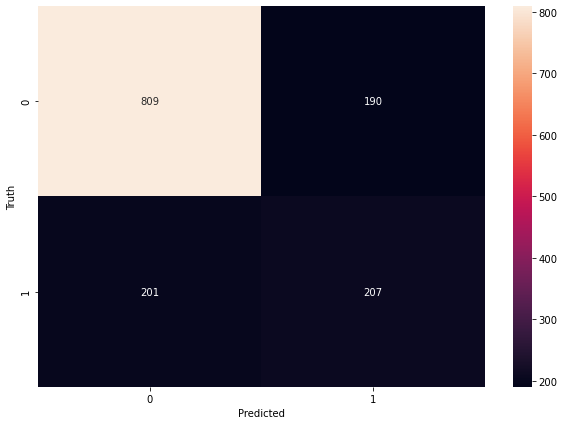

In [62]:
#confusion matrix
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")